In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, shapiro, spearmanr, pearsonr, wilcoxon

In [2]:
df = pd.read_csv("social media influencers - instagram.csv")
df.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [3]:
df.rename(columns={
    "Influencer insta name": "Handle",
    "instagram name": "Name",
    "category_1": "Category_1",
    "category_2": "Category_2",
    "Followers": "Followers",
    "Audience country(mostly)": "Audience_Country",
    "Authentic engagement\r\n": "Engagement",
    "Engagement avg\r\n": "Engagement_Average"
}, inplace=True)

In [4]:
df.head()

,Handle,Name,Category_1,Category_2,Followers,Audience_Country,Engagement,Engagement_Average
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [5]:
def convert_to_numeric(value):
    if isinstance(value, str):
        if "M" in value:
            return float(value.replace("M", "")) * 1e6
        elif "K" in value:
            return float(value.replace("K", "")) * 1e3
    return float(value)

In [6]:
df["Followers"] = df["Followers"].apply(convert_to_numeric)
df["Engagement"] = df["Engagement"].apply(convert_to_numeric)
df["Engagement_Average"] = df["Engagement_Average"].apply(convert_to_numeric)

In [7]:
df = df.sort_values(by="Followers", ascending=False)

In [8]:
df.head(10)

,Handle,Name,Category_1,Category_2,Followers,Audience_Country,Engagement,Engagement_Average
388,instagram,Instagram,Photography,NaN,487200000.0,India,352300.0,467400.0
203,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,419600000.0,India,5700000.0,7000000.0
510,kyliejenner,Kylie 🤍,Fashion,Modeling,323300000.0,United States,7600000.0,12300000.0
532,leomessi,Leo Messi,Sports with a ball,Family,315400000.0,Argentina,4000000.0,5300000.0
814,selenagomez,Selena Gomez,Music,Lifestyle,308200000.0,United States,3300000.0,4400000.0
899,therock,therock,Cinema & Actors/actresses,Fitness & Gym,307000000.0,India,303400.0,396000.0
87,arianagrande,Ariana Grande,Music,NaN,302300000.0,United States,2900000.0,4100000.0
494,kimkardashian,Kim Kardashian,Fashion,Beauty,296400000.0,United States,2000000.0,2900000.0
126,beyonce,Beyoncé,Music,Fashion,246900000.0,United States,2600000.0,3700000.0
489,khloekardashian,Khloé Kardashian,Clothing & Outfits,Lifestyle,230200000.0,United States,991100.0,1200000.0


In [9]:
df["Category_1"].unique()

array(['Photography', 'Sports with a ball', 'Fashion', 'Music',
       'Cinema & Actors/actresses', 'Clothing & Outfits', 'Modeling',
       'Nature & landscapes', 'Fitness & Gym', 'Lifestyle', 'Shows',
       'Science', nan, 'Family', 'Finance & Economics', 'Beauty',
       'Humor & Fun & Happiness', 'Accessories & Jewellery',
       'Food & Cooking', 'Cars & Motorbikes', 'Luxury', 'Art/Artists',
       'Computers & Gadgets', 'Racing Sports', 'Business & Careers',
       'Adult content', 'Literature & Journalism',
       'Machinery & Technologies', 'Management & Marketing', 'Animals',
       'Kids & Toys', 'Education'], dtype=object)

In [10]:
df["Category_2"].unique()

array([nan, 'Modeling', 'Family', 'Lifestyle', 'Fitness & Gym', 'Beauty',
       'Fashion', 'Science', 'Shopping & Retail',
       'Cinema & Actors/actresses', 'Photography', 'Sports with a ball',
       'Music', 'Business & Careers', 'Art/Artists', 'Comics & sketches',
       'Clothing & Outfits', 'Shows', 'Luxury', 'Cars & Motorbikes',
       'Machinery & Technologies', 'Humor & Fun & Happiness',
       'Adult content', 'Literature & Journalism', 'Kids & Toys',
       'Finance & Economics', 'Computers & Gadgets', 'Trainers & Coaches'],
      dtype=object)

In [11]:
# Mapping original categories to the refined tree structure
category_mapping = {
    # Sports & Fitness
    "Sports with a ball": "Sports & Fitness",
    "Racing Sports": "Sports & Fitness",
    "Fitness & Gym": "Sports & Fitness",
    "Trainers & Coaches": "Sports & Fitness",
    "Cars & Motorbikes": "Sports & Fitness",
    
    # Entertainment
    "Cinema & Actors/actresses": "Entertainment",
    "Shows": "Entertainment",
    "Humor & Fun & Happiness": "Entertainment",
    "Comics & sketches": "Entertainment",
    "Modeling": "Entertainment",
    
    # Music
    "Music": "Music",
    
    # Nature
    "Nature & landscapes": "Nature",
    "Animals": "Nature",
    
    # Arts, Photography & Literature
    "Photography": "Arts, Photography & Literature",
    "Art/Artists": "Arts, Photography & Literature",
    "Literature & Journalism": "Arts, Photography & Literature",
    
    # Lifestyle
    "Family": "Lifestyle",
    "Kids & Toys": "Lifestyle",
    "Food & Cooking": "Lifestyle",
    "Lifestyle": "Lifestyle",
    
    # Adult Content
    "Adult content": "Adult Content",
    
    # Fashion & Beauty
    "Fashion": "Fashion & Beauty",
    "Clothing & Outfits": "Fashion & Beauty",
    "Accessories & Jewellery": "Fashion & Beauty",
    "Beauty": "Fashion & Beauty",
    "Luxury": "Fashion & Beauty",
    "Shopping & Retail": "Fashion & Beauty",
    
    # Education, Science & Technology
    "Education": "Education, Science & Technology",
    "Science": "Education, Science & Technology",
    "Computers & Gadgets": "Education, Science & Technology",
    "Machinery & Technologies": "Education, Science & Technology",
    
    # Finance
    "Finance & Economics": "Finance",
    "Business & Careers": "Finance",
    "Management & Marketing": "Finance",
}

# Apply mapping to both Category_1 and Category_2
df['Cat_1'] = df['Category_1'].map(category_mapping).fillna('None')
df['Cat_2'] = df['Category_2'].map(category_mapping).fillna('None')

# Display the updated DataFrame
print(df[['Category_1', 'Cat_1', 'Category_2', 'Cat_2']])

             Category_1                           Cat_1  \
388         Photography  Arts, Photography & Literature   
203  Sports with a ball                Sports & Fitness   
510             Fashion                Fashion & Beauty   
532  Sports with a ball                Sports & Fitness   
814               Music                           Music   
..                  ...                             ...   
255                 NaN                            None   
316                 NaN                            None   
7             Lifestyle                       Lifestyle   
337                 NaN                            None   
26                  NaN                            None   

                    Category_2          Cat_2  
388                        NaN           None  
203                        NaN           None  
510                   Modeling  Entertainment  
532                     Family      Lifestyle  
814                  Lifestyle      Lifestyle  
.. 

In [22]:
df.head(5)

,Handle,Name,Category_1,Category_2,Followers,Audience_Country,Engagement,Engagement_Average,Cat_1,Cat_2
388,instagram,Instagram,Photography,NaN,487200000.0,India,352300.0,467400.0,"Arts, Photography & Literature",None
203,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,419600000.0,India,5700000.0,7000000.0,Sports & Fitness,None
510,kyliejenner,Kylie 🤍,Fashion,Modeling,323300000.0,United States,7600000.0,12300000.0,Fashion & Beauty,Entertainment
532,leomessi,Leo Messi,Sports with a ball,Family,315400000.0,Argentina,4000000.0,5300000.0,Sports & Fitness,Lifestyle
814,selenagomez,Selena Gomez,Music,Lifestyle,308200000.0,United States,3300000.0,4400000.0,Music,Lifestyle


## Ein-Stichproben-t-Test

In [13]:
# Nach 'Music' Kategorie filtern
music_df = df[df['Category_1'] == 'Music']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


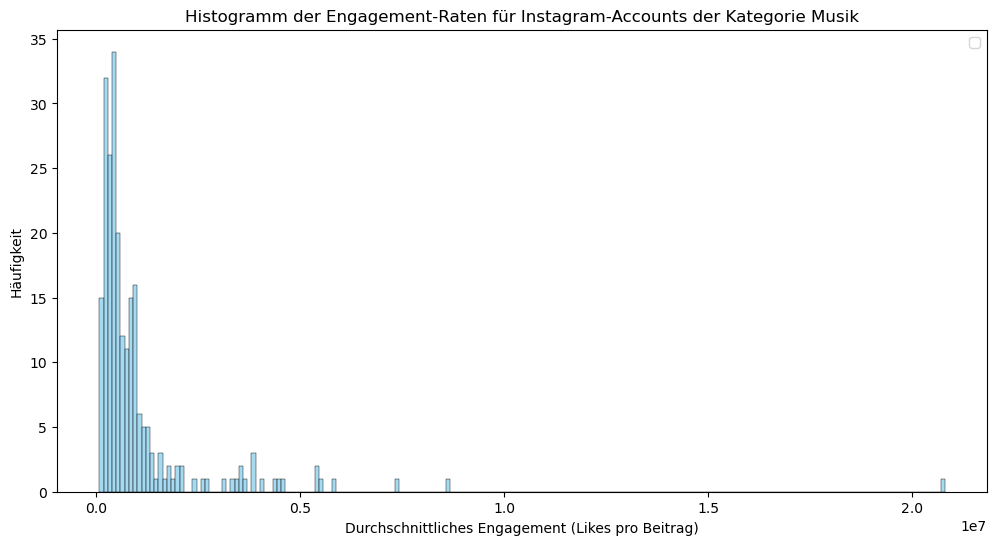

In [27]:
# Visualisierung
plt.figure(figsize=(12, 6))
sns.histplot(music_df['Engagement_Average'], bins=200, kde=False, color='skyblue')
plt.xlabel('Durchschnittliches Engagement (Likes pro Beitrag)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Engagement-Raten für Instagram-Accounts der Kategorie Musik')
plt.legend()
plt.show()

In [26]:
shapiro_test_stat, shapiro_p_value = shapiro(music_df['Engagement'])
print(f"Shapiro-Wilk Teststatistik: {shapiro_test_stat}, p-Wert: {shapiro_p_value}")
if shapiro_p_value > 0.05:
    print("Die Engagement-Daten sind normalverteilt.")
else:
    print("Die Engagement-Daten sind nicht normalverteilt.")

Shapiro-Wilk Teststatistik: 0.4950096011161804, p-Wert: 2.0536182985132527e-25
Die Engagement-Daten sind nicht normalverteilt.


In [14]:
# Berechnung und Test
sample_mean = music_df['Engagement_Average'].mean()
industry_standard = 400000  

t_stat, p_value = stats.ttest_1samp(music_df['Engagement_Average'], industry_standard)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


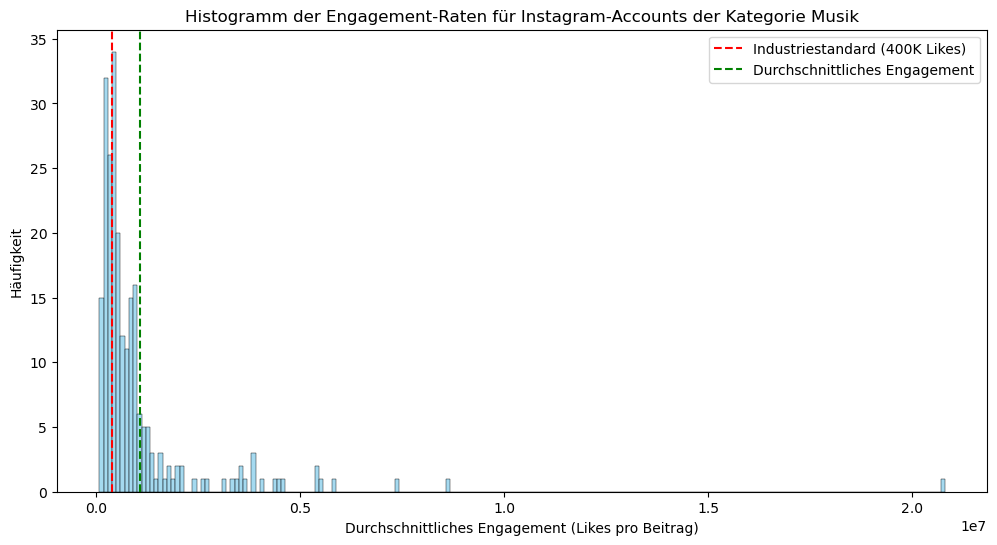

In [15]:
# Visualisierung
plt.figure(figsize=(12, 6))
sns.histplot(music_df['Engagement_Average'], bins=200, kde=False, color='skyblue')
plt.axvline(industry_standard, color='red', linestyle='dashed', linewidth=1.5, label='Industriestandard (400K Likes)')
plt.axvline(sample_mean, color='green', linestyle='dashed', linewidth=1.5, label='Durchschnittliches Engagement')
plt.xlabel('Durchschnittliches Engagement (Likes pro Beitrag)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Engagement-Raten für Instagram-Accounts der Kategorie Musik')
plt.legend()
plt.show()

In [16]:
# Ausgabe der Ergebnisse
print(f"Das durchschnittliche Engagement der Stichprobe beträgt {sample_mean:.2f} Likes.")
print(f"Teststatistik (t-Wert): {t_stat:.2f}, P-Wert: {p_value:.3f}")
if p_value < 0.05:
    print("Basierend auf dem P-Wert, der unter der üblichen Signifikanzgrenze von 0.05 liegt, können wir die Nullhypothese ablehnen.")
    print("Das bedeutet, dass das durchschnittliche Engagement signifikant vom Industriestandard abweicht.")
else:
    print("Basierend auf dem P-Wert, der über der üblichen Signifikanzgrenze von 0.05 liegt, gibt es keine ausreichenden Beweise, um die Nullhypothese abzulehnen.")
    print("Das bedeutet, dass das durchschnittliche Engagement nicht signifikant vom Industriestandard abweicht.")

Das durchschnittliche Engagement der Stichprobe beträgt 1066515.74 Likes.
Teststatistik (t-Wert): 5.69, P-Wert: 0.000
Basierend auf dem P-Wert, der unter der üblichen Signifikanzgrenze von 0.05 liegt, können wir die Nullhypothese ablehnen.
Das bedeutet, dass das durchschnittliche Engagement signifikant vom Industriestandard abweicht.


## Nicht-parametrisch: Wilcoxon Test

In [30]:
sample_engagement = music_df['Engagement_Average']

# Differenz zwischen Engagement-Daten und Industriestandard berechnen
differences = [x - industry_standard for x in sample_engagement]

# Wilcoxon-Test durchführen
# Nur für paarweise Vergleiche geeignet, daher prüft man die Differenzen gegen 0
test_stat, p_value = wilcoxon(differences)

# Ergebnisse ausgeben
print(f"Teststatistik (Wilcoxon-Wert): {test_stat:.2f}, P-Wert: {p_value:.3f}")
if p_value < 0.05:
    print("Basierend auf dem P-Wert, der unter der üblichen Signifikanzgrenze von 0.05 liegt, können wir die Nullhypothese ablehnen.")
    print("Das durchschnittliche Engagement weicht signifikant vom Industriestandard ab.")
else:
    print("Basierend auf dem P-Wert, der über der üblichen Signifikanzgrenze von 0.05 liegt, gibt es keine ausreichenden Beweise, um die Nullhypothese abzulehnen.")
    print("Das durchschnittliche Engagement entspricht dem Industriestandard.")

Teststatistik (Wilcoxon-Wert): 5745.00, P-Wert: 0.000
Basierend auf dem P-Wert, der unter der üblichen Signifikanzgrenze von 0.05 liegt, können wir die Nullhypothese ablehnen.
Das durchschnittliche Engagement weicht signifikant vom Industriestandard ab.


## t-Test für unabhängige Stichproben

In [17]:
# Daten für die Kategorie "Sports & Fitness"
sports_fitness = df[df['Cat_1'] == 'Sports & Fitness']['Engagement_Average']

# Daten für die Kategorie "Fashion & Beauty"
fashion_beauty = df[df['Cat_1'] == 'Fashion & Beauty']['Engagement_Average']

In [18]:
sf_mean = sports_fitness.mean().round(2)
fb_mean = fashion_beauty.mean().round(2)

In [19]:
t_stat, p_value = stats.ttest_ind(sports_fitness, fashion_beauty, equal_var=False)

In [20]:
# Ausgabe der durchschnittlichen Engagement-Werte
print("Durchschnittliches Engagement für 'Sports & Fitness':", sf_mean, "Likes")
print("Durchschnittliches Engagement für 'Fashion & Beauty':", fb_mean, "Likes")

print("t-Statistik:", t_stat)
print("p-Wert:", p_value)

if p_value < 0.05:
    print("Es gibt einen signifikanten Unterschied im Engagement zwischen 'Sports & Fitness' und 'Fashion & Beauty'.")
else:
    print("Es gibt keinen signifikanten Unterschied im Engagement zwischen 'Sports & Fitness' und 'Fashion & Beauty'.")


Durchschnittliches Engagement für 'Sports & Fitness': 633165.19 Likes
Durchschnittliches Engagement für 'Fashion & Beauty': 862761.36 Likes
t-Statistik: -0.7971377436758892
p-Wert: 0.42916593165500705
Es gibt keinen signifikanten Unterschied im Engagement zwischen 'Sports & Fitness' und 'Fashion & Beauty'.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


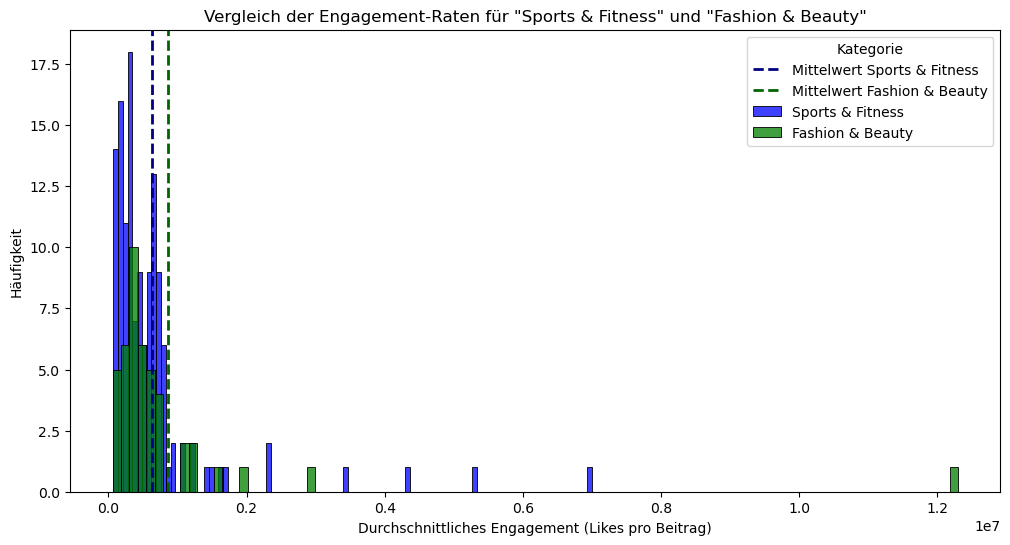

In [21]:
plt.figure(figsize=(12, 6))

# Histogramm für "Sports & Fitness"
sns.histplot(sports_fitness, color='blue', label='Sports & Fitness', bins=100, kde=False)

# Histogramm für "Fashion & Beauty"
sns.histplot(fashion_beauty, color='green', label='Fashion & Beauty', bins=100, kde=False)
plt.axvline(sf_mean, color='navy', linestyle='dashed', linewidth=2, label='Mittelwert Sports & Fitness')
plt.axvline(fb_mean, color='darkgreen', linestyle='dashed', linewidth=2, label='Mittelwert Fashion & Beauty')
plt.xlabel('Durchschnittliches Engagement (Likes pro Beitrag)')
plt.ylabel('Häufigkeit')
plt.title('Vergleich der Engagement-Raten für "Sports & Fitness" und "Fashion & Beauty"')
plt.legend(title='Kategorie')
plt.show()

## Chi-Quadrat-Test auf Unabhängigkeit

In [90]:
# Filtere den DataFrame nach den gewünschten Ländern
filtered_df = df[df['Audience_Country'].isin(['United States', 'India', 'Brazil'])]

In [91]:
# Erstelle eine Kreuztabelle
contingency_table = pd.crosstab(filtered_df['Cat_1'], filtered_df['Audience_Country'])
print(contingency_table)

Audience_Country                 Brazil  India  United States
Cat_1                                                        
Adult Content                         1      1              3
Arts, Photography & Literature        4      3              5
Education, Science & Technology       0      3              6
Entertainment                        56     79             83
Fashion & Beauty                      6      9             15
Finance                               2      2              2
Lifestyle                            18     12             30
Music                                36     14             82
Nature                                0      1              3
None                                 12      7             24
Sports & Fitness                     17     18             26


In [92]:
from scipy.stats import chi2_contingency

# Führe den Chi-Quadrat-Test durch
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Quadrat Statistik:", chi2)
print("p-Wert:", p_value)


Chi-Quadrat Statistik: 41.83270318670904
p-Wert: 0.00290777939184064
